In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/synthetic_air_quality_dataset_mse2.csv")


In [5]:
print(df.head())
print(df.describe())
print(df['Air_Quality_Level'].value_counts())


   Temperature   Humidity       PM2.5         NO2 Air_Quality_Level
0    27.483571  40.048955   73.529955  131.422011          Moderate
1    24.308678  36.274070   20.649195   19.450557              Good
2    28.238443  68.185815   41.327469   78.216441              Good
3    32.615149  72.388544  108.269588  161.743836         Unhealthy
4    23.829233  31.895169  242.749847   89.527085         Hazardous
       Temperature     Humidity        PM2.5          NO2
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     25.096660    60.218928   153.403546   101.181208
std       4.896080    17.301410    83.786704    55.709061
min       8.793663    30.193096    10.003374     5.005990
25%      21.762048    44.831947    84.391818    53.442135
50%      25.126503    60.967562   152.596075   100.454157
75%      28.239719    74.779118   224.202376   148.228615
max      44.263657    89.964824   299.368048   199.913752
Air_Quality_Level
Hazardous    344
Unhealthy    338
Moderate     172
G

In [6]:
le = LabelEncoder()
df['Air_Quality_Label'] = le.fit_transform(df['Air_Quality_Level'])

X = df[['Temperature', 'Humidity', 'PM2.5', 'NO2']]
y = df['Air_Quality_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


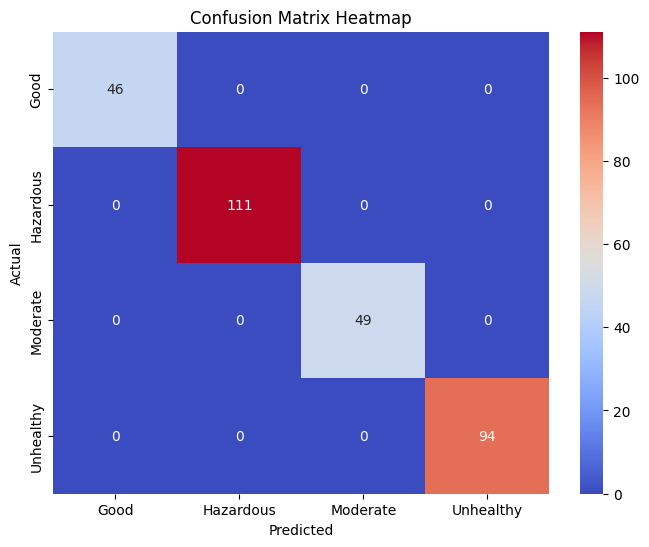

Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        46
   Hazardous       1.00      1.00      1.00       111
    Moderate       1.00      1.00      1.00        49
   Unhealthy       1.00      1.00      1.00        94

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


In [9]:
sample_preds = pd.DataFrame({
    "Actual": le.inverse_transform(y_test[:10].values),
    "Predicted": le.inverse_transform(y_pred[:10])
})
print(sample_preds)


      Actual  Predicted
0       Good       Good
1       Good       Good
2  Unhealthy  Unhealthy
3  Hazardous  Hazardous
4   Moderate   Moderate
5  Unhealthy  Unhealthy
6  Hazardous  Hazardous
7  Hazardous  Hazardous
8  Unhealthy  Unhealthy
9  Hazardous  Hazardous


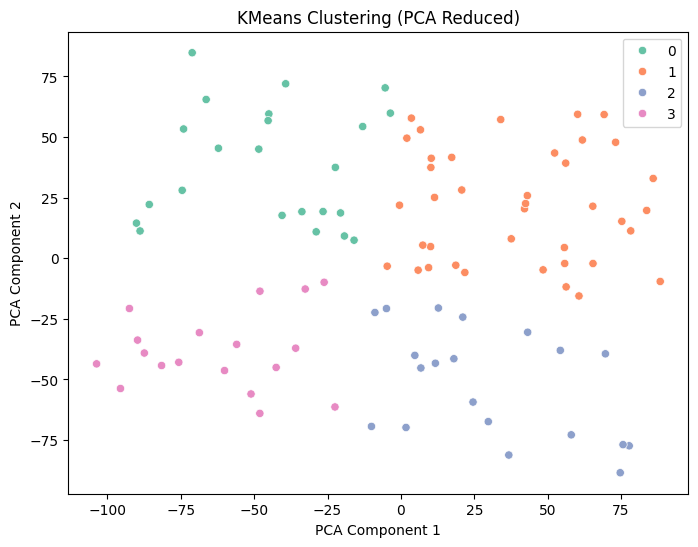

In [12]:
# Reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("KMeans Clustering (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
